# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from scipy import stats

# Prepare datasets

In [2]:
df_x = pd.read_csv('../data/dataset_02/data.csv')
df_y = pd.read_csv('../data/dataset_02/answer.csv')

In [3]:
df_x = df_x.drop(labels=['Unnamed: 0'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_y = df_y.drop(labels=['Unnamed: 0'], axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
48801,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [5]:
df = pd.concat([df_x, df_y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [6]:
labels = [str(i) for i in range(672)]

In [7]:
df = df.drop_duplicates(subset=labels, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [8]:
df_x = df.drop(labels=['x1', 'y1', 'z1', 'x2', 'y2', 'z2'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
df_y = df.drop(labels=labels, axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
19959,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [10]:
df_x = np.reshape(df_x.to_numpy(), (-1, 1, 24, 28))
df_x.shape

(19964, 1, 24, 28)

In [11]:
df_y = df_y.to_numpy()
df_y

array([[  0.10871,  -0.2796 ,  14.997  ,  10.61088,  10.45806,  -1.743  ],
       [ 10.61088,  10.45806,  -1.743  ,   0.10871,  -0.2796 ,  14.997  ],
       [  0.10871,  -0.2796 ,  14.997  ,  11.8341 ,   1.03286,  -9.159  ],
       ...,
       [  8.72039,   6.20611,  10.509  ,  -0.19256,   0.23003, -14.997  ],
       [ -0.19256,   0.23003, -14.997  ,   2.34033,  14.49242,   3.081  ],
       [  2.34033,  14.49242,   3.081  ,  -0.19256,   0.23003, -14.997  ]])

In [12]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [13]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(12037, 1, 24, 28)
(12037, 6)
(5930, 1, 24, 28)
(5930, 6)
(1997, 1, 24, 28)
(1997, 6)


(None, None)

In [14]:
train_x = torch.tensor(train_x).float()
train_y = torch.tensor(train_y).float()
valid_x = torch.tensor(valid_x).float()
valid_y = torch.tensor(valid_y).float()
test_x = torch.tensor(test_x).float()
test_y = torch.tensor(test_y).float()

# CNN

In [37]:
lr = 1e-3
batch_size = 64
max_epoch = 30

In [38]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = nn.Conv2d(1, 32, 7)
        self.max_pool_1 = nn.MaxPool2d(2, stride=2)
        self.conv_2 = nn.Conv2d(32, 64, 3)
        self.max_pool_2 = nn.MaxPool2d(2, stride=2)
        self.hidden_1 = nn.Linear(768, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.hidden_3 = nn.Linear(64, 64)
        self.hidden_4 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 6)

    def forward(self, x):
        x = torch.relu(self.conv_1(x))
        x = self.max_pool_1(x)
        x = torch.relu(self.conv_2(x))
        x = self.max_pool_2(x)
        x = torch.reshape(x, (x.shape[0], 768))
        x = torch.relu(self.hidden_1(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_3(x))
        x = torch.relu(self.hidden_4(x))
        output = self.output(x)
        return output

In [39]:
model = Model()
model

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (max_pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_1): Linear(in_features=768, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3): Linear(in_features=64, out_features=64, bias=True)
  (hidden_4): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [40]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [41]:
# init weights
def init_weights(model) -> None:
    if isinstance(model, nn.Linear):
        torch.nn.init.xavier_uniform_(model.weight)
        model.bias.data.fill_(0.1)

model.apply(init_weights)

# if torch.cuda.is_available():
#     model = model.cuda()

#     train_x = train_x.cuda()
#     train_y = train_y.cuda()
#     valid_x = valid_x.cuda()
#     valid_y = valid_y.cuda()
#     test_x = test_x.cuda()
#     test_y = test_y.cuda()

Model(
  (conv_1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (max_pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_1): Linear(in_features=768, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3): Linear(in_features=64, out_features=64, bias=True)
  (hidden_4): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [42]:
losses_train = []
losses_valid = []

for epoch in range(max_epoch):
    train_loss = 0.0
    for i in range(0, train_x.size()[0], batch_size):
        data = train_x[i:i + batch_size]
        target = train_y[i:i + batch_size]

        optimizer.zero_grad()
        prediction = model(data)
        loss = loss_function(prediction, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    valid_loss = 0.0
    for i in range(0, valid_x.size()[0], batch_size):
        data = valid_x[i:i + batch_size]
        target = valid_y[i:i + batch_size]

        prediction = model(data)
        loss = loss_function(prediction, target)
        valid_loss += loss.item()

    # if (epoch) % 10 == 0:
    print(
        f'Epoch {epoch} \t\t Training Loss: {train_loss / len(train_x)} \t\t Validation Loss: {valid_loss / len(valid_x)}'
    )
    
    if (epoch > 0 and valid_loss / len(valid_x)  < min(losses_valid)):
        torch.save(model.state_dict(), 
           "../logs/weights_model_03/model_state_adam_01.pt")
        print("Save model")
        
    
    losses_train.append(train_loss / len(train_x))
    losses_valid.append(valid_loss / len(valid_x))

Epoch 0 		 Training Loss: 1.0828574258960084 		 Validation Loss: 1.1319806386809326
Epoch 1 		 Training Loss: 0.9637759085795685 		 Validation Loss: 0.9695195788275733
Save model
Epoch 2 		 Training Loss: 0.8228568761384575 		 Validation Loss: 0.817530498536803
Save model
Epoch 3 		 Training Loss: 0.7543610349944969 		 Validation Loss: 0.7512941743229935
Save model
Epoch 4 		 Training Loss: 0.6271954107256816 		 Validation Loss: 0.6441885267904195
Save model
Epoch 5 		 Training Loss: 0.5416399382213882 		 Validation Loss: 0.6054938449827455
Save model
Epoch 6 		 Training Loss: 0.4766085729989596 		 Validation Loss: 0.5560038497435906
Save model
Epoch 7 		 Training Loss: 0.45324247917523264 		 Validation Loss: 0.5596358731866486
Epoch 8 		 Training Loss: 0.40501955588057836 		 Validation Loss: 0.5105139016703047
Save model
Epoch 9 		 Training Loss: 0.3789380711258136 		 Validation Loss: 0.49409640989255343
Save model
Epoch 10 		 Training Loss: 0.3841441871419325 		 Validation Loss: 0.48

In [113]:
# torch.save(model.state_dict(), 
        #    "../logs/weights_model_03/model_state_rmsprop.pt")

In [114]:
losses = pd.DataFrame([losses_train, losses_valid],
                      index=["Train loss", "Valid loss"]).T
losses

,Train loss,Valid loss
0,2.099565,3.087852
1,1.762841,1.823841
2,1.584397,1.844512
3,1.253782,1.315357
4,1.047684,1.259303
5,0.954952,1.058638
6,0.869825,1.098710
7,0.798443,1.380142
8,0.763100,0.919316
9,0.717714,0.991498


Text(0, 0.5, 'Значение функции потерь')

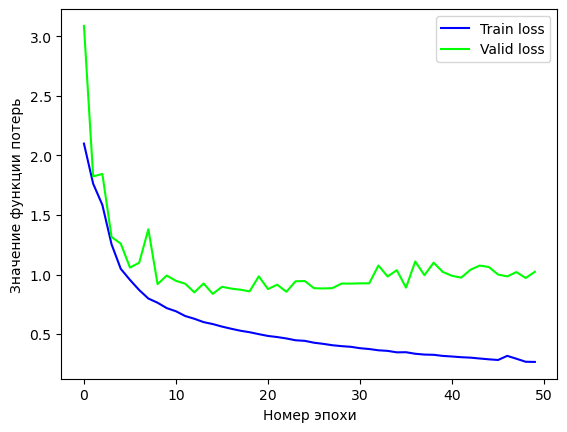

In [115]:
ax = losses.plot(colormap="brg")
ax.set_xlabel("Номер эпохи")
ax.set_ylabel("Значение функции потерь")